In [159]:
import pandas as pd 
import mlrose_hiive as rose
import numpy as np 
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner,MIMICRunner
##from mlrose_hiive.runners._runner_base import _RunnerBase
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split,validation_curve,learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import category_encoders
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
#from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import time 
import warnings
warnings.filterwarnings("ignore")


In [160]:
pd.set_option('display.max_rows', None)
data=pd.read_csv('heart.csv')
x=data.drop(['output'],axis=1)
y=data['output']
scale=MinMaxScaler().fit(x)
newx=scale.transform(x)
traintime=[]
predicttime=[]
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.2,random_state=1)

grad_simulated= rose.NeuralNetwork(hidden_nodes = [20], activation ='tanh', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 5000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 123,curve=True)


In [161]:
time1=time.time()
grad_simulated.fit(x_train,y_train)
time2=time.time()
traintime.append(time2-time1)
simulated_y_pred=grad_simulated.predict(x_test)
time3=time.time()
predicttime.append(time3-time2)
simulated_pred_rate=accuracy_score(y_test,simulated_y_pred)
simulated_f1=f1_score(y_test,simulated_y_pred)
simulated_ft= grad_simulated.fitness_curve


print ("simulated_pred_rate" + str(simulated_pred_rate))
print(simulated_ft)

simulated_pred_rate0.7213114754098361
[[9.69974044e-01 3.00000000e+00]
 [9.75138626e-01 5.00000000e+00]
 [9.73686666e-01 7.00000000e+00]
 ...
 [3.17271564e-01 9.23400000e+03]
 [3.17941933e-01 9.23600000e+03]
 [3.17961869e-01 9.23800000e+03]]


In [162]:
grad_rhc= rose.NeuralNetwork(hidden_nodes = [20], activation ='tanh', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 5000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 123,curve=True)
time1=time.time()
grad_rhc.fit(x_train,y_train)
time2=time.time()
traintime.append(time2-time1)
rhc_y_pred=grad_rhc.predict(x_test)
time3=time.time()
predicttime.append(time3-time2)
rhc_pred_rate=accuracy_score(y_test,rhc_y_pred)
rhc_f1=f1_score(y_test,rhc_y_pred)
rhc_ft= grad_rhc.fitness_curve
print ("rhc_pred_rate" + str(rhc_pred_rate))
print(rhc_ft)


rhc_pred_rate0.7540983606557377
[[9.69974044e-01 2.00000000e+00]
 [9.69974044e-01 3.00000000e+00]
 [9.68549291e-01 5.00000000e+00]
 ...
 [2.09464313e-01 7.00600000e+03]
 [2.09464313e-01 7.00700000e+03]
 [2.09464313e-01 7.00800000e+03]]


In [163]:
grad_ga= rose.NeuralNetwork(hidden_nodes = [20], activation ='tanh', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 5000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 123,curve=True,pop_size=500)
time1=time.time()

grad_ga.fit(x_train,y_train)
time2=time.time()

ga_y_pred=grad_ga.predict(x_test)
time3=time.time()
traintime.append(time2-time1)
predicttime.append(time3-time2)
ga_pred_rate=accuracy_score(y_test,ga_y_pred)
ga_f1=f1_score(y_test,ga_y_pred)
ga_ft= grad_ga.fitness_curve

In [164]:
grad_gd= rose.NeuralNetwork(hidden_nodes = [20], activation ='tanh', 
                                 algorithm ='gradient_descent', 
                                 max_iters = 5000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 123,curve=True)
time1=time.time()
grad_gd.fit(x_train,y_train)
time2=time.time()
gd_y_pred=grad_gd.predict(x_test)
time3=time.time()
traintime.append(time2-time1)
predicttime.append(time3-time2)

gd_pred_rate=accuracy_score(y_test,gd_y_pred)
gd_f1=f1_score(y_test,gd_y_pred)
gd_ft= grad_gd.fitness_curve

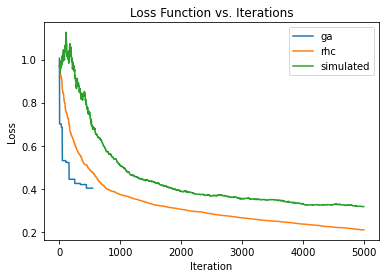

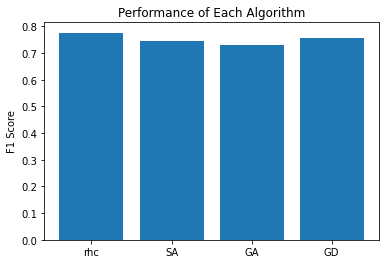

In [165]:
plt.plot(range(len(ga_ft)), ga_ft[:,0], label='ga')
plt.plot(range(len(rhc_ft)), rhc_ft[:,0], label='rhc')
plt.plot(range(len(simulated_ft)), simulated_ft[:,0], label='simulated')
plt.title("Loss Function vs. Iterations")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.show()
barvalue=[rhc_f1,simulated_f1,ga_f1,gd_f1]
plt.bar( np.arange(len(barvalue)),barvalue)
plt.title("Performance of Each Algorithm")
plt.ylabel('F1 Score')
plt.xticks(np.arange(len(barvalue)),['rhc','SA','GA','GD'])
plt.show()

Text(0, 0.5, 'Loss')

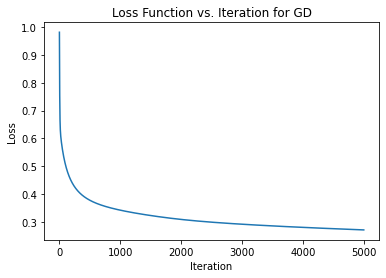

In [166]:
plt.plot(gd_ft)
plt.title("Loss Function vs. Iteration for GD" )
plt.xlabel('Iteration')
plt.ylabel('Loss')


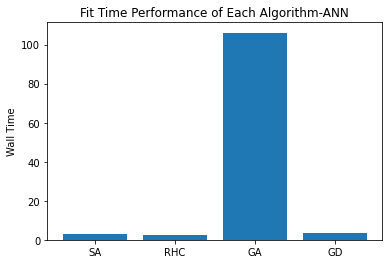

In [167]:
plt.bar( np.arange(len(traintime)),traintime)
plt.title("Fit Time Performance of Each Algorithm-ANN")
plt.ylabel('Wall Time')
plt.xticks(np.arange(len(barvalue)),['SA','RHC','GA','GD'])
plt.show()